In [1]:
print('Starting Imports')
import numpy as np
from scipy.special import gamma
# from MechanismsOneDimension import *
# from MechanismsStripped import *
import sys
from time import time
import resource

import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
filename = 'ValsDir/'
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Nu = [-8.392574042553191, -6.154902000000053]
# Eta = [-10.43183144680852, -8.19415940425528]
# Lambda = [-8.392574042553191, -6.154902000000053]
Nu = [-12,-6.154902]
Eta = [-12,-8.154902]
Lambda = [-12,-6.154902]

Nus= np.linspace(10**Nu[0],10**Nu[1],50)
Etas=np.linspace(10**Eta[0],10**Eta[1],50)
Lambdas=np.linspace(10**Lambda[0],10**Lambda[1],50)

# def testFunc(*args,**kwargs):
#     for i in args:
#         print(i)
#     for key, value in kwargs.items():
#         if key=='item':
#             print(value)

Starting Imports


In [2]:
class MechAn:
    def __init__(self,home_dir,EtaLim, NuLim, LambdaLim):
        self.root = home_dir
        self.Eta= EtaLim
        self.Nu = NuLim
        self.Lambda = LambdaLim
        self.FileList = []
        self.percentiles=[.75,.9,.95,.99]
        self.teststatistics={}
        self.stats={}
        self.AreaQuantiles = [.01,.05,.1,.125,.25,.5,.75,.875,.9,.95,.99]
        
    def SetParams(self,**kwargs):
        ParamDict={}
        for key,value in kwargs.items():
            ParamDict[key]=value
        self.ParamDict = ParamDict
        
    def FindFiles(self, ExcludeDirs):
        FileList = []
        flag1 = False
        for root, dirs, files in os.walk(self.root):
            if not np.any([self.root+item == root for item in ExcludeDirs]):
                for file in files:
                    if os.stat(os.path.join(root,file)).st_size>5000:
                        try: 
                            tempdat = pd.read_pickle(os.path.join(root,file))
                        except:
                            continue

                        if False not in [self.ParamDict[key] in list(tempdat[key]) for key in self.ParamDict if key != 'TrueE']:
                            if tempdat[tempdat['TrueE'].map(tuple).isin([tuple(self.ParamDict['TrueE'])])].shape[0]>0:
                                FileList.append(os.path.join(root,file))
#                     print(len(FileList))
        print('Found '+str(len(FileList))+' files fitting those parameters')
        self.FileList = FileList
        return (len(FileList))
    
    def GetBestKTLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['KTE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict

    
    def GetBestTLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['TE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict

    
    def GetBestKLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['KE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict
                
    
        
        
    def GetTestStatistic(self,newPercentiles = False,Verbose=False):
        if newPercentiles:
            self.percentiles = newPercentiles
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]
                
        print('Full DF Shape after cuts:',FullDF.shape)
        FullDF = FullDF[FullDF['MinKT'] >0]
        print('Shape after Removing Nans',FullDF.shape)
#         samp_list = list(set(list(FullDF['Samps'])))
#         percent_in = [.75,.90,.95,.99,.995]
        # Chi_lines = [1.33, 2.71,3.84,6.64]
        KTCut=[]
        TCut=[]


        KTLS = FullDF['KTL']
        TLS = FullDF['TL']
        KLS = FullDF['KL']
        DefKT = FullDF['DefKT']
        minKT = FullDF['MinKT']

        KTLS=-1*KTLS
        TLS=-1*TLS
        KLS = -1*KLS
        KTLS = sorted(KTLS)
        TLS = sorted(TLS)
        KLS = sorted(KLS)
        
        if Verbose==1:
            return FullDF
        elif Verbose ==2:
            return KTLS,TLS,KLS
        elif Verbose ==3:
            return DefKT,minKT
        
        for j2 in self.percentiles:
    #         print(int(j*len(KTLS)))
#             print(len(KTLS),int(j2*len(KTLS)))
            KTCut.append(KTLS[int(j2*len(KTLS))])
            TCut.append(TLS[int(j2*len(TLS))])
        self.teststatistics['TL'] = TCut
        self.teststatistics['KTL']= KTCut
        if Verbose == 4:
            return TCut, KTCut


        
    def GetAreas(self,returnAreas=False,PType=False, returnStats=False, returnHist=False):
        TCut = self.teststatistics['TL']
        KTCut = self.teststatistics['KTL']
        indes=[]
        files=0
        if 'KTAreas' not in locals():
            KTAreas={}
            TAreas={}
        for file in self.FileList:
                if os.path.exists(file):
                    tempdf = pd.read_pickle(file)
                    files+=1
                else:
                    continue


                for key in self.ParamDict:
                    if key == 'TrueE':
                        tempdf = tempdf[tempdf[key].map(tuple).isin([tuple(self.ParamDict[key])])]
                    else:
                        tempdf = tempdf[tempdf[key]==self.ParamDict[key]]
                    tempdf= tempdf[tempdf['MinKT'] >0]

                for l in range(0,tempdf.shape[0]):
                    for j in range(0,len(self.percentiles)):
                        if str(self.percentiles[j]) not in KTAreas.keys():


                            inde=np.argmin([np.abs(item -1*KTCut[j]) for item in tempdf['KTX'].iloc[l]])

                            KTAreas[str(self.percentiles[j])] = [tempdf['KTY'].iloc[l][inde]]

                            indes.append(inde)
                            inde=np.argmin([ np.abs(item -1*TCut[j]) for item in tempdf['TX'].iloc[l]])
                            TAreas[str(self.percentiles[j])] = [tempdf['TY'].iloc[l][inde]]
                        else:

                            inde=np.argmin([np.abs(item -1*KTCut[j]) for item in tempdf['KTX'].iloc[l]])
                            KTAreas[str(self.percentiles[j])].append(tempdf['KTY'].iloc[l][inde])

                            indes.append(inde)
                            inde=np.argmin([ np.abs(item -1*TCut[j]) for item in tempdf['TX'].iloc[l]])
                            TAreas[str(self.percentiles[j])].append(tempdf['TY'].iloc[l][inde])
        self.Quants={} 
        for j in self.percentiles:
            self.Quants['T,'+str(j)]=np.quantile(TAreas[str(j)],self.AreaQuantiles)
            self.Quants['KT,'+str(j)] =  np.quantile(KTAreas[str(j)],self.AreaQuantiles)
            
        if returnAreas:
            bpax = returnAreas.boxplot([np.asarray(KTAreas[str(j)])/np.asarray(TAreas[str(j)]) for j in self.percentiles],positions = [i for i in range(0,len(self.percentiles))],showfliers=False)
            
            if PType=='grid':
                returnAreas.set_title(str(self.ParamDict['TrueE']))
                returnAreas.set_xticklabels([str(round(item*100,0)) for item in self.percentiles])
                returnAreas.grid(which='major', linestyle=':', linewidth='0.5', color='red')
            elif PType=='comp':
                returnAreas.set_title('Res: '+ str(self.ParamDict['Res']) +'  Samples: '+str(self.ParamDict['Samps']))
                returnAreas.set_xticklabels([str(round(item*100,0)) for item in self.percentiles])
                returnAreas.grid(which='major', linestyle=':', linewidth='0.5', color='red')
            return bpax
        
        if returnStats:
            return(self.Quants)
        if returnHist:
            return([KTAreas[str(self.percentiles[0])][i]/TAreas[str(self.percentiles[0])][i] for i in range(0,len(KTAreas[str(self.percentiles[0])]))])
            
        


            

In [8]:
samps=[50,1000,25000]
Eta={}
Nu={}
Lambda={}
EtaT={}
NuT={}
LambdaT={}
EtaK={}
NuK={}
LambdaK={}

QDir ={}
hl = np.load('/home/kelly/PycharmProjects/ThesisMech/HalflivesLin50_V2.npy')
filename='ValsDir/'
for i in range(0,len(samps)):

    TestMechAn = MechAn(filename,Nu,Eta,Lambda)
    TestMechAn.SetParams(Res = 10, Samps = samps[i], TrueE=[12,12,12],Tol=1) #[3,7,20]
    TestMechAn.FindFiles(ExcludeDirs=['Run100NoAdapt','Run1000NoAdapt','Run1NoAdapt','Run1Adapt','Run1000Adapt'])


    TE = TestMechAn.GetBestTLE()


    EtaT[i]=[item[0] for item in TE]
    NuT[i]=[item[1] for item in TE]
    LambdaT[i]=[item[2] for item in TE]



    

Found 199 files fitting those parameters
Found 999 files fitting those parameters
Found 999 files fitting those parameters


/home/kelly/Desktop/MechEnv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


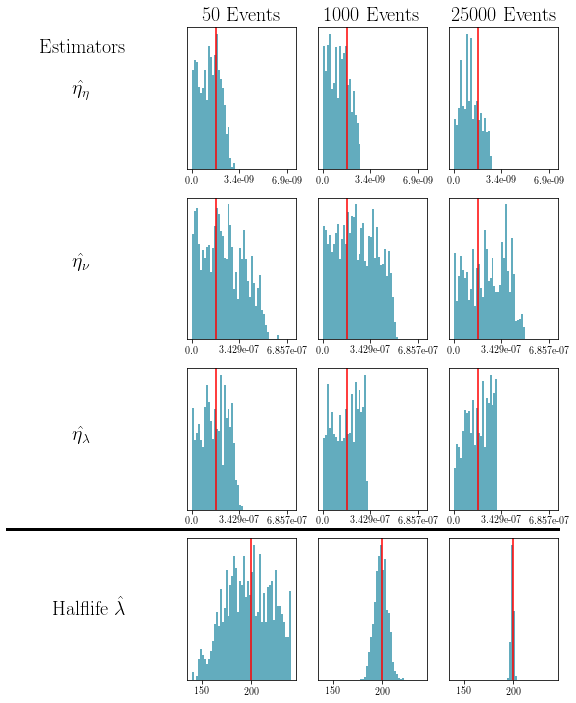

In [9]:
# hl = np.load('1KeVAdapt/HalflivesLin50.npy')

f1 = plt.figure(figsize=(9,12))

for i in range(0,len(samps)):

    E = EtaT[i]
    N= NuT[i]
    L = LambdaT[i]
    filen = 'TNorm.png'


    D = [hl[E[l],N[l],L[l]] for l in range(0,len(E))]

    ax4 = f1.add_subplot(4,4,i+2)
    ax4.hist(E,bins=50,range=(0,50),normed=True,color='#63ACBE')
#     ax4.set_xlabel('Eta')
    ax4.set_title(str(samps[i])+' Events',size=20)
    ax4.axvline(12,color='r')
    ax4.set_yticks([],[])
    
    ax4.set_xticks([0,24,48])
    ax4.set_xticklabels([round(Etas[0],10),round(Etas[24],10),round(Etas[48],10)])

    ax5 = f1.add_subplot(4,4,i+6)
#     ax5.set_xlabel('Nu')

    ax5.hist(N,bins=50,range=(0,50),normed=True,color='#63ACBE')
    ax5.axvline(12,color='r')
    ax5.set_yticks([],[])
    ax5.set_xticks([0,24,48])
    ax5.set_xticklabels([round(Nus[0],10),round(Nus[24],10),round(Nus[48],10)])


    ax6 = f1.add_subplot(4,4,i+10)
#     ax6.set_xlabel('Lambda')

    ax6.hist(L,bins=50,range=(0,50),normed=True,color='#63ACBE')
    ax6.axvline(12,color='r')
    ax6.set_yticks([],[])
    ax6.set_xticks([0,24,48])
    ax6.set_xticklabels([round(Lambdas[0],10),round(Lambdas[24],10),round(Lambdas[48],10)])


    ax7 = f1.add_subplot(4,4,i+14)
    ax7.hist(D,bins=50,normed=True,color='#63ACBE',range=(140,240))
    ax7.axvline(hl[12,12,12],color='r')
    ax7.set_yticks([],[])



#     ax7.set_xlabel('Halflife')


h1 = .75
h2 = .55
h3 = .35
plt.plot([.05, .9], [.3,.3], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
# plt.plot([.1, .9], [h2,h2], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
# plt.plot([.1, .9], [h3,h3], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
plt.text(.1,.85,'Estimators', transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.15,h1+.05,r'$\hat{\eta_{\eta}}$', transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.15,h2+.05,r'$\hat{\eta_{\nu}}$', transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.15,h3+.05,r'$\hat{\eta_{\lambda}}$', transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.12,.2,r'Halflife $\hat{\lambda}$', transform=plt.gcf().transFigure,clip_on=False,size=20)

plt.savefig(filen)


In [25]:
hl.shape

(25, 25, 25)

In [23]:
np.exp(-10)*25000

1.1349982440621214

Starting
Done with rv
Done with func


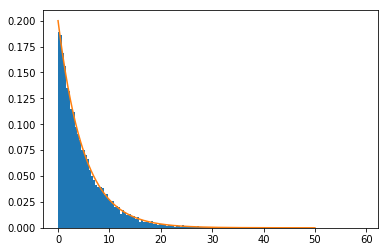

In [15]:

print('Starting')
t = np.random.rand(1,20000)
t = np.reshape(t,(t.shape[1]))
ts = -5*np.log(1-t)
print('Done with rv')   
x = np.linspace(0,50,1000)
y = [.2*np.exp(-xi/5) for xi in x]
print('Done with func')
plt.figure()
plt.hist(ts,normed=True,bins='auto')
plt.plot(x,y)
plt.show()

In [10]:
np.reshape(ts,(2000))

array([0.26943202, 3.21494189, 4.51293956, ..., 3.72908321, 3.1116313 ,
       1.2960125 ])